# 06-06 다층 퍼셉트론으로 MNIST 분류하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [8]:
mnist.target = mnist.target.astype(np.int8)

In [14]:
X = mnist.data / 255
Y = mnist.target

이 이미지 데이터의 레이블은 5이다.


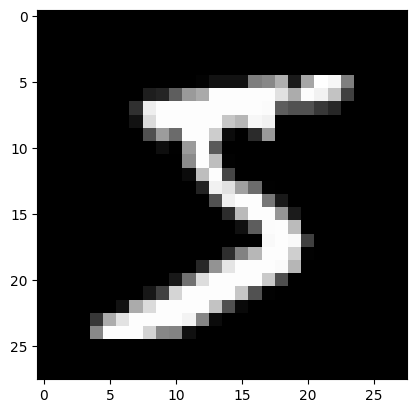

In [22]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다.".format(Y[0]))

In [24]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/7, random_state=0)

In [26]:
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

ds_train = TensorDataset(X_train, Y_train)
ds_test = TensorDataset(X_test, Y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [27]:
from torch import nn, optim

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [30]:
epochs = 3

for epoch in range(epochs):
    for data, targets in loader_train:
        optimizer.zero_grad()
        y_pred = model(data)
        loss = loss_fn(y_pred, targets)
        loss.backward()
        optimizer.step()

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch + 1, 3, loss.item()))

Epoch    1/3 Cost: 0.160602
Epoch    2/3 Cost: 0.011786
Epoch    3/3 Cost: 0.264187


In [33]:
model.eval()
correct = 0

with torch.no_grad():
    for data, targets in loader_test:
        y_pred = model(data)
        _, predicted = torch.max(y_pred.data, 1)
        correct += predicted.eq(targets.data.view_as(predicted)).sum()

    print('Accuracy: {:.2f}%'.format(100 * correct / len(ds_test)))

Accuracy: 95.93%


예측 결과 : 4
정답 레이블 : 4


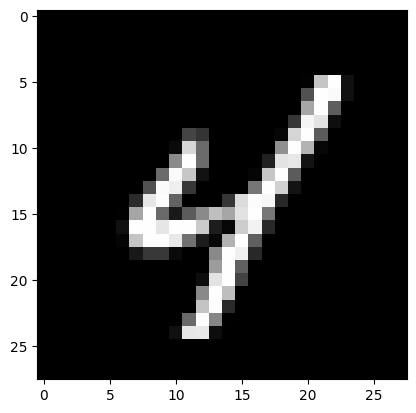

In [35]:
index = 4096
model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("예측 결과 : {}".format(predicted.item()))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("정답 레이블 : {}".format(Y_test[index].item()))